In [2]:
print("Dead Kennedys - Your Emotions\n"
"\nPlanless and mindless scraps from anywhere")

Dead Kennedys - Your Emotions

Planless and mindless scraps from anywhere


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os #managing files
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D

In [4]:
train_dir_path = r"C:\Users\12489\Documents\Data\Dataset_Emotion_Recognition\data\train"
test_dir_path = r"C:\Users\12489\Documents\Data\Dataset_Emotion_Recognition\data\test"

In [5]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+"\\"+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [6]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(train_dir_path)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\12489\Documents\Data\Dataset_Emotion_...,surprise
1,C:\Users\12489\Documents\Data\Dataset_Emotion_...,fear
2,C:\Users\12489\Documents\Data\Dataset_Emotion_...,neutral
3,C:\Users\12489\Documents\Data\Dataset_Emotion_...,neutral
4,C:\Users\12489\Documents\Data\Dataset_Emotion_...,sad


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(test_dir_path)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\12489\Documents\Data\Dataset_Emotion_...,angry
1,C:\Users\12489\Documents\Data\Dataset_Emotion_...,angry
2,C:\Users\12489\Documents\Data\Dataset_Emotion_...,angry
3,C:\Users\12489\Documents\Data\Dataset_Emotion_...,angry
4,C:\Users\12489\Documents\Data\Dataset_Emotion_...,angry


<AxesSubplot:xlabel='label', ylabel='count'>

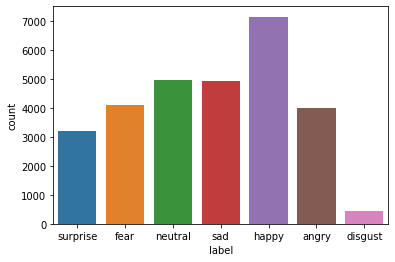

In [8]:
sns.countplot(train['label'])

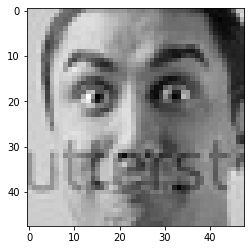

In [9]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

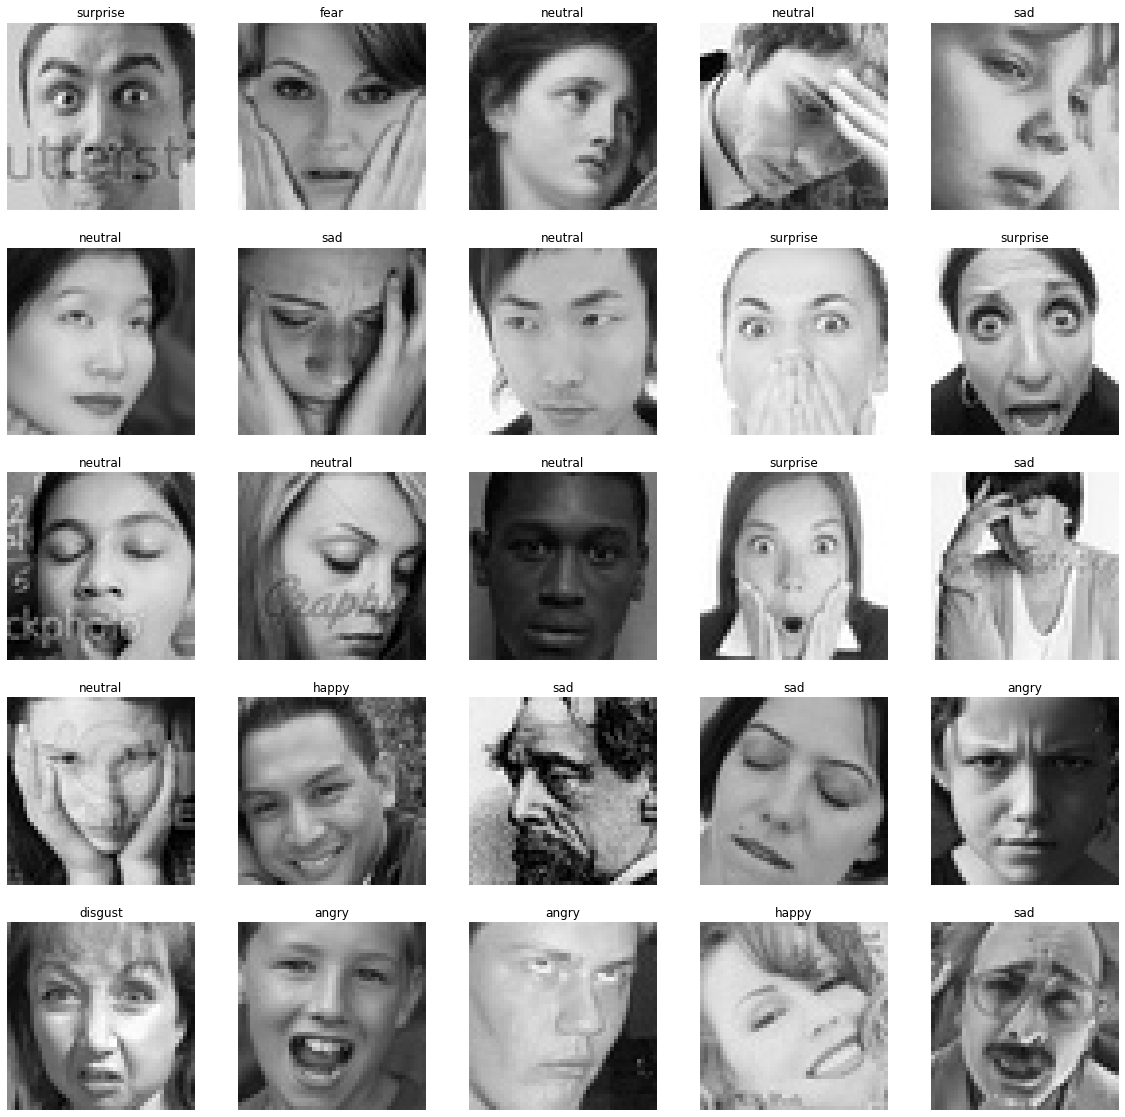

In [10]:
from keras.preprocessing import image

plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = image.load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [11]:
from tqdm.notebook import tqdm

def extract_features(images):
    features = []
    for x in tqdm(images):
        img = image.load_img(x, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [12]:
train_features = extract_features(train['image'])

  0%|          | 0/28820 [00:00<?, ?it/s]

In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [14]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [18]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [20]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
226/226 [==============================] - 237s 1s/step - loss: 1.8246 - accuracy: 0.2426 - val_loss: 1.8143 - val_accuracy: 0.2583
Epoch 2/10
226/226 [==============================] - 240s 1s/step - loss: 1.7996 - accuracy: 0.2519 - val_loss: 1.7465 - val_accuracy: 0.2787
Epoch 3/10
226/226 [==============================] - 239s 1s/step - loss: 1.7158 - accuracy: 0.2968 - val_loss: 1.5941 - val_accuracy: 0.3705
Epoch 4/10
226/226 [==============================] - 239s 1s/step - loss: 1.5940 - accuracy: 0.3677 - val_loss: 1.4520 - val_accuracy: 0.4457
Epoch 5/10
226/226 [==============================] - 229s 1s/step - loss: 1.4934 - accuracy: 0.4205 - val_loss: 1.4323 - val_accuracy: 0.4397
Epoch 6/10
226/226 [==============================] - 225s 996ms/step - loss: 1.4283 - accuracy: 0.4483 - val_loss: 1.3232 - val_accuracy: 0.4979
Epoch 7/10
226/226 [==============================] - 225s 997ms/step - loss: 1.3861 - accuracy: 0.4684 - val_loss: 1.2654 - val_accuracy: 

In [21]:
history.history['accuracy']

[0.24257460236549377,
 0.25190839171409607,
 0.29684245586395264,
 0.36769604682922363,
 0.4205065965652466,
 0.4482997953891754,
 0.46839001774787903,
 0.48102012276649475,
 0.49260929226875305,
 0.49916723370552063]

In [22]:
history.history['val_accuracy']

[0.25827908515930176,
 0.27865836024284363,
 0.3705066442489624,
 0.4456552565097809,
 0.4397113025188446,
 0.4978771507740021,
 0.5101896524429321,
 0.5275969505310059,
 0.5411831140518188,
 0.5400509238243103]

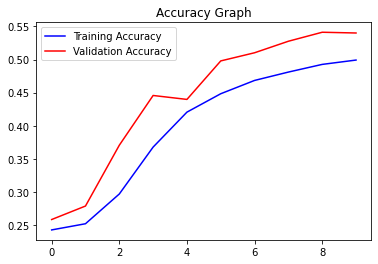

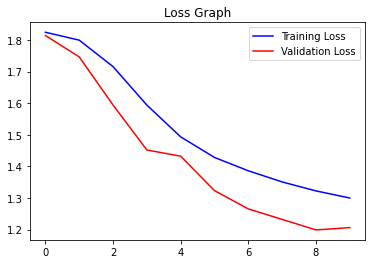

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: angry
Predicted Output: angry


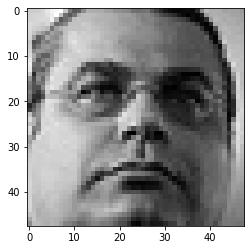

In [24]:
import random

image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
Predicted Output: sad


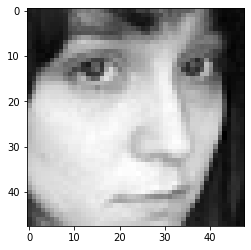

In [25]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
Predicted Output: happy


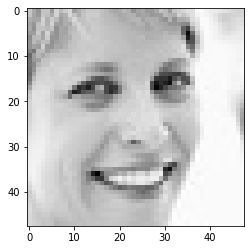

In [26]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

----------------------------------------------

In [27]:
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)

# config
input_shape = (48, 48, 1)
output_class = 7

In [28]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

*increasing the epochs...*

In [29]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
226/226 [==============================] - 229s 1s/step - loss: 1.8242 - accuracy: 0.2419 - val_loss: 1.7776 - val_accuracy: 0.2600
Epoch 2/20
226/226 [==============================] - 228s 1s/step - loss: 1.6885 - accuracy: 0.3130 - val_loss: 1.6684 - val_accuracy: 0.3262
Epoch 3/20
226/226 [==============================] - 230s 1s/step - loss: 1.5094 - accuracy: 0.4176 - val_loss: 1.5850 - val_accuracy: 0.4326
Epoch 4/20
226/226 [==============================] - 228s 1s/step - loss: 1.3956 - accuracy: 0.4667 - val_loss: 1.3626 - val_accuracy: 0.4667
Epoch 5/20
226/226 [==============================] - 228s 1s/step - loss: 1.3338 - accuracy: 0.4907 - val_loss: 1.3337 - val_accuracy: 0.4689
Epoch 6/20
226/226 [==============================] - 229s 1s/step - loss: 1.2893 - accuracy: 0.5101 - val_loss: 1.2527 - val_accuracy: 0.5306
Epoch 7/20
226/226 [==============================] - 229s 1s/step - loss: 1.2527 - accuracy: 0.5262 - val_loss: 1.2434 - val_accuracy: 0.5277

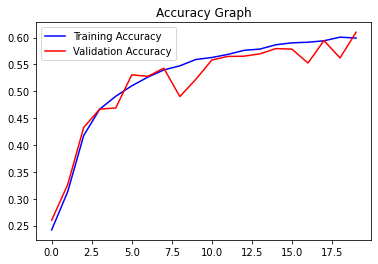

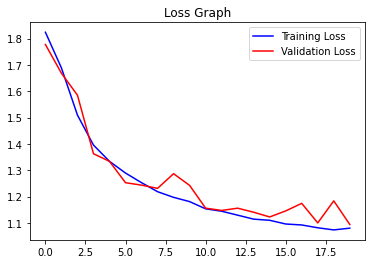

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: angry
Predicted Output: angry


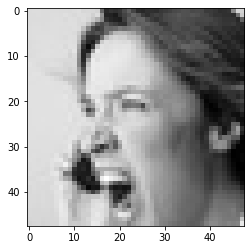

In [31]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: sad
Predicted Output: sad


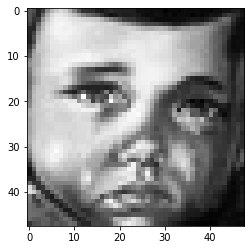

In [32]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: happy
Predicted Output: happy


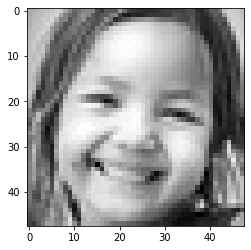

In [33]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

--------------------

In [34]:
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)

input_shape = (48, 48, 1)
output_class = 7

In [35]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

*increasing the epochs...*

In [36]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
226/226 [==============================] - 242s 1s/step - loss: 1.8382 - accuracy: 0.2441 - val_loss: 1.7958 - val_accuracy: 0.2610
Epoch 2/50
226/226 [==============================] - 241s 1s/step - loss: 1.6938 - accuracy: 0.3099 - val_loss: 1.5934 - val_accuracy: 0.3682
Epoch 3/50
226/226 [==============================] - 241s 1s/step - loss: 1.5036 - accuracy: 0.4158 - val_loss: 1.4258 - val_accuracy: 0.4464
Epoch 4/50
226/226 [==============================] - 242s 1s/step - loss: 1.4049 - accuracy: 0.4610 - val_loss: 1.4352 - val_accuracy: 0.4298
Epoch 5/50
226/226 [==============================] - 235s 1s/step - loss: 1.3382 - accuracy: 0.4890 - val_loss: 1.3359 - val_accuracy: 0.4993
Epoch 6/50
226/226 [==============================] - 241s 1s/step - loss: 1.2824 - accuracy: 0.5134 - val_loss: 1.3341 - val_accuracy: 0.4935
Epoch 7/50
226/226 [==============================] - 242s 1s/step - loss: 1.2552 - accuracy: 0.5231 - val_loss: 1.2701 - val_accuracy: 0.5250

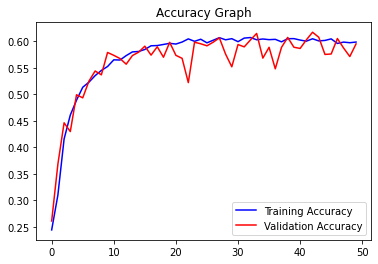

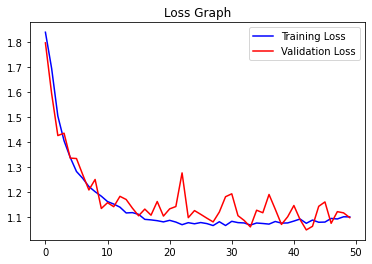

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: neutral
Predicted Output: neutral


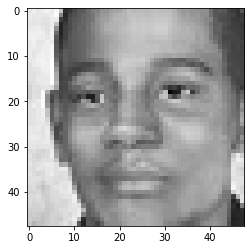

In [38]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: fear
Predicted Output: fear


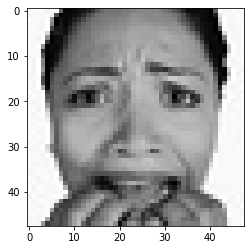

In [39]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: surprise
Predicted Output: surprise


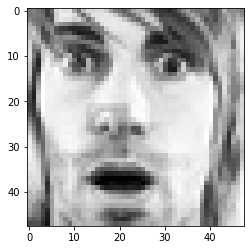

In [40]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')